# __Chapter 01__

# Exploratory Data Analysis

## Elements of Structured Data

There are two basic types of structured data: __numeric__ and __categorical__.

_Numeric_ data
comes in two forms:
1. continuous, such as wind speed or time duration,
2. and discrete,
such as the count of the occurrence of an event.

_Categorical_ data takes only a fixed set
of values, such as a type of TV screen (plasma, LCD, LED, etc.) or a state name (Ala‐
bama, Alaska, etc.).
- Binary data is an important special case of categorical data that
takes on only one of two values, such as 0/1, yes/no, or true/false.
- Another useful type
of categorical data is ordinal data in which the categories are ordered; an example of
this is a numerical rating (1, 2, 3, 4, or 5).

Why do we bother with a taxonomy of data types? It turns out that for the purposes
of data analysis and predictive modeling, the data type is important to help determine
the type of visual display, data analysis, or statistical model.

Software engineers and database programmers may wonder why we even need the
notion of categorical and ordinal data for analytics. After all, categories are merely a
collection of text (or numeric) values, and the underlying database automatically han‐
dles the internal representation. However, explicit identification of data as categorical,
as distinct from text, does offer some advantages

* Knowing that data is categorical can act as a signal telling software how statistical
procedures, such as producing a chart or fitting a model, should behave. In particular, ordinal data can be represented as an ordered.factor in R, preserving a
user-specified ordering in charts, tables, and models. In Python, scikit-learn
supports ordinal data with the sklearn.preprocessing.OrdinalEncoder .
* Storage and indexing can be optimized (as in a relational database).
* The possible values a given categorical variable can take are enforced in the software (like an enum).

## Rectangular Data

The typical frame of reference for an analysis in data science is a rectangular data
object, like a spreadsheet or database table.
Rectangular data is the general term for a two-dimensional matrix with rows indicating records (cases) and columns indicating features (variables).

__Data frame__
* Rectangular data (like a spreadsheet) is the basic data structure for statistical and
machine learning models.

__Feature__
* A column within a table is commonly referred to as a feature.
Synonyms: attribute, input, predictor, variable

__Outcome__
* Many data science projects involve predicting an outcome—often a yes/no outcome. The features are sometimes used to predict the outcome in an experiment or a study.
Synonyms: dependent variable, response, target, output

__Records__
* A row within a table is commonly referred to as a record.
Synonyms: case, example, instance, observation, pattern, sample

## Data Frames and Indexes

Traditional database tables have one or more columns designated as an index, essentially a row number. This can vastly improve the efficiency of certain database queries

## Estimates of Location

Variables with measured or count data might have thousands of distinct values. A
basic step in exploring your data is getting a “typical value” for each feature (variable):
an estimate of where most of the data is located (i.e., its central tendency).

### Key Terms for Estimates of Location

__Mean__:
* The sum of all values divided by the number of values.
    Synonym: avergae

__Weighted mean__:
* The sum of all values times a weight divided by the sum of the weights.
    Synonym: wighted average.
    
__Median__:
* The value such that one-half of the data lies above and below.
    Synonym: 50th Percentile

__Percentile__:
* The value such that $P$ percent of the data lies below.
    Synonym: quantile.
    
__Weighted median__:
* The value such that one-half of the sum of the weights lies above and below the
    sorted data.

__Trimmed mean__:
* The average of all values after dropping a fixed number of extreme values.
    Synonym: truncated mean,
    
__Robuts__:
* Non sensitive to extreme values. Synonym: resistant.

__Outlier__:
* A data value that is very different from most of the data.
    Synonym: extreme value.

Statisticians often use the term estimate for a value calculated from
the data at hand, to draw a distinction between what we see from
the data and the theoretical true or exact state of affairs. Data scientists and business analysts are more likely to refer to such a value as
a metric. The difference reflects the approach of statistics versus
that of data science: accounting for uncertainty lies at the heart of
the discipline of statistics, whereas concrete business or organizational objectives are the focus of data science. Hence, statisticians
estimate, and data scientists measure.

### Mean
The most basic estimate of location is the __mean__, or average value. The mean is the
sum of all values divided by the number of values.
The formula to compute the mean for a set of $n$ values $x_1 , x_2 , ..., x_n$ is:

$$ \bar{x} = \frac{\sum_{i = 1}^{n} x_i}{n}$$

N (or n) refers to the total number of records or observations. In
statistics it is capitalized if it is referring to a population, and lowercase if it refers to a sample from a population. In data science, that
distinction is not vital, so you may see it both ways.

A variation of the mean is a __trimmed mean__, which you calculate by dropping a fixed
number of sorted values at each end and then taking an average of the remaining val‐
ues. Representing the sorted values by $x_1 , x_2 , ..., x_n$ where $x_1$ is the smallest value
and $x_n$ the largest, the formula to compute the trimmed mean with p smallest and
largest values omitted is:

$$ \bar{x} = \frac{\sum_{i = p + 1}^{n - p} x_{(i)}}{n - 2p}$$

A trimmed mean eliminates the influence of extreme values. For example, in international diving the top score and bottom score from five judges are dropped, and the
final score is the average of the scores from the three remaining judges. This makes it
difficult for a single judge to manipulate the score, perhaps to favor their country’s
contestant. Trimmed means are widely used, and in many cases are preferable to
using the ordinary mean.

Another type of mean is a __weighted mean__, which you calculate by multiplying each
data value $x_i$ by a user-specified weight $w$ i and dividing their sum by the sum of the
weights. The formula for a weighted mean is:

$$ \bar{x_w} = \frac{\sum_{i = 1}^{n} w_i x_i}{\sum_{i = 1}^{n} w_i}$$

There are two main motivations for using a weighted mean:
* Some values are intrinsically more variable than others, and highly variable
observations are given a lower weight. For example, if we are taking the average
from multiple sensors and one of the sensors is less accurate, then we might
downweight the data from that sensor.
* The data collected does not equally represent the different groups that we are
interested in measuring. For example, because of the way an online experiment
was conducted, we may not have a set of data that accurately reflects all groups in
the user base. To correct that, we can give a higher weight to the values from the
groups that were underrepresented.

### Median and Robust Estimates

The median is the middle number on a sorted list of the data. If there is an even number of data values, the middle value is one that is not actually in the data set, but
rather the average of the two values that divide the sorted data into upper and lower
halves. Compared to the mean, which uses all observations, the median depends only
on the values in the center of the sorted data.

While this might seem to be a disadvan‐
tage, since the mean is much more sensitive to the data, there are many instances in
which the median is a better metric for location. Let’s say we want to look at typical
household incomes in neighborhoods around Lake Washington in Seattle. In comparing the Medina neighborhood to the Windermere neighborhood, using the mean
would produce very different results because Bill Gates lives in Medina. If we use the
median, it won’t matter how rich Bill Gates is—the position of the middle observation
will remain the same.

For the same reasons that one uses a weighted mean, it is also possible to compute a
weighted median. As with the median, we first sort the data, although each data value
has an associated weight. Instead of the middle number, the weighted median is a
value such that the sum of the weights is equal for the lower and upper halves of the
sorted list. Like the median, the weighted median is robust to outliers.

### Outliers
The median is referred to as a robust estimate of location since it is not influenced by
outliers (extreme cases) that could skew the results. An outlier is any value that is very
distant from the other values in a data set.

Being an outlier in itself does
not make a data value invalid or erroneous (as in the previous example with Bill
Gates). Still, outliers are often the result of data errors such as mixing data of different
units (kilometers versus meters) or bad readings from a sensor. When outliers are the
result of bad data, the mean will result in a poor estimate of location, while the
median will still be valid. In any case, outliers should be identified and are usually
worthy of further investigation.

#### Anomaly Detection
In contrast to typical data analysis, where outliers are sometimes
informative and sometimes a nuisance, in anomaly detection the
points of interest are the outliers, and the greater mass of data
serves primarily to define the “normal” against which anomalies
are measured.

The median is not the only robust estimate of location. In fact, a trimmed mean is
widely used to avoid the influence of outliers. For example, trimming the bottom and
top 10% (a common choice) of the data will provide protection against outliers in all
but the smallest data sets. The trimmed mean can be thought of as a compromise
between the median and the mean: it is robust to extreme values in the data, but uses
more data to calculate the estimate for location.

#### Other Robust Metrics for Location
Statisticians have developed a plethora of other estimators for location, primarily with the goal of developing an estimator more
robust than the mean and also more efficient (i.e., better able to
discern small location differences between data sets). While these
methods are potentially useful for small data sets, they are not
likely to provide added benefit for large or even moderately sized
data sets.

### Example: Location Estimates of Population and Murder Rates

Example shows the first few rows in the data set containing population and murder
rates (in units of murders per 100,000 people per year) for each US state (2010
Census).

In [1]:
import numpy as np
from scipy import stats
import pandas as pd

In [2]:
state = pd.read_csv('../data/state.csv')

In [3]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [4]:
state['Population'].mean()

6162876.3

In [5]:
stats.trim_mean(state['Population'], 0.1)

4783697.125

In [6]:
state['Population'].median()

4436369.5

The mean is bigger than the trimmed mean, which is bigger than the median.

This is because the trimmed mean excludes the largest and smallest five states
( `trim = 0.1` drops 10% from each end). If we want to compute the average murder rate
for the country, we need to use a weighted mean or median to account for different
populations in the states.

Weighted mean is available with NumPy

In [7]:
np.average(state['Murder.Rate'], weights = state['Population'])

4.445833981123393

For weighted median, we can use the specialized package wquantiles

In [8]:
import wquantiles
wquantiles.median(state['Murder.Rate'], weights = state['Population'])

4.4

In statistics, a __central tendency__ (or measure of central tendency) is a central or typical value for a probability distribution. It may also be called a center or location of the distribution. Colloquially, measures of central tendency are often called averages. The term central tendency dates from the late 1920s.

The most common measures of __central tendency__ are the arithmetic mean, the median, and the mode. A middle tendency can be calculated for either a finite set of values or for a theoretical distribution, such as the normal distribution. Occasionally authors use central tendency to denote "the tendency of quantitative data to cluster around some central value.

The central tendency of a distribution is typically contrasted with its __dispersion__ or __variability__; dispersion and central tendency are the often characterized properties of distributions. Analysis may judge whether data has a strong or a weak central tendency based on its dispersion. 

The following may be applied to one-dimensional data. Depending on the circumstances, it may be appropriate to transform the data before calculating a central tendency. Examples are squaring the values or taking logarithms. Whether a transformation is appropriate and what it should be, depend heavily on the data being analyzed.

__Arithmetic mean__ or simply, __mean__
*    the sum of all measurements divided by the number of observations in the data set.

__Median__
*    the middle value that separates the higher half from the lower half of the data set. __The median and the mode are the only measures of central tendency that can be used for ordinal data, in which values are ranked relative to each other but are not measured absolutely__.

__Mode__
*    the most frequent value in the data set. __This is the only central tendency measure that can be used with nominal data, which have purely qualitative category assignments__.

__Geometric mean__
*    the nth root of the product of the data values, where there are n of these. This measure is valid only for data that are measured absolutely on a strictly positive scale.

$$ G = \Big( \prod_{i = 1}^{n} x_i \Big) ^{\frac{1}{n}} = \sqrt[n]{x_1 x_2 ... x_n}$$

__Harmonic mean__
*    the reciprocal of the arithmetic mean of the reciprocals of the data values. This measure too is valid only for data that are measured absolutely on a strictly positive scale.

$$ H = \frac{n}{\sum_{i = i}^{n} \frac{1}{x_i}}$$
__Weighted arithmetic mean__
*    an arithmetic mean that incorporates weighting to certain data elements.

__Truncated mean or trimmed mean__
*    the arithmetic mean of data values after a certain number or proportion of the highest and lowest data values have been discarded.

__Interquartile mean__
*    a truncated mean based on data within the interquartile range.

__Midrange__
*    the arithmetic mean of the maximum and minimum values of a data set.

__Midhinge__
*    the arithmetic mean of the first and third quartiles.

__Trimean__
*    the weighted arithmetic mean of the median and two quartiles.

__Winsorized mean__
*    an arithmetic mean in which extreme values are replaced by values closer to the median.



Any of the above may be applied to each dimension of multi-dimensional data, but the results may not be invariant to rotations of the multi-dimensional space. In addition, there are the

__Geometric median__
*    which minimizes the sum of distances to the data points. This is the same as the median when applied to one-dimensional data, but it is not the same as taking the median of each dimension independently. It is not invariant to different rescaling of the different dimensions.

__Quadratic mean__ (often known as the root mean square)
*    useful in engineering, but not often used in statistics. This is because it is not a good indicator of the center of the distribution when the distribution includes negative values.

__Simplicial depth__
*    the probability that a randomly chosen simplex with vertices from the given distribution will contain the given center

__Tukey median__
*    a point with the property that every halfspace containing it also contains many sample points

For unimodal distributions (distributions possesing a unique mode) the following bounds are known and are sharp:

$$ \frac{|\theta - \mu|}{\sigma} \le \sqrt{3} $$

$$ \frac{|\nu - \mu|}{\sigma} \le \sqrt{0.6} $$

$$ \frac{|\theta - \nu|}{\sigma} \le \sqrt{3}$$

where $\mu$ is the mean, $\nu$ is the median, $\theta$ is the mode, and $\sigma$ is the standard deviation. 

For every distribution

$$ \frac{|\nu - \mu|}{\sigma} \le 1 $$

## Estimates of Variability
Location is just one dimension in summarizing a feature. A second dimension, variability, also referred to as dispersion, measures whether the data values are tightly clustered or spread out. At the heart of statistics lies variability: measuring it, reducing it,
distinguishing random from real variability, identifying the various sources of real
variability, and making decisions in the presence of it.

----

__Deviations__:
* The difference between the observed values and the estimate of location.
    Synonyms: errors, residuals
    
__Variance__:
* The sum of squared deviations from the mean divided by $ n - 1 $ where 
    $n$ is the number of data values.
    Synonym: mean-squared-error

__Standard deviation__:
* The square root of the variance.

__Mean absolute deviation__:
* The mean of the absolute values of the deviations from the mean.
    Synonym: L1-norm, Manhattan norm.

__Median absoute deviation from the median__:
* The median of the absolute valus of the deviations from the median.

__Range__:
* The differences between the largest and the smalles value in a dataset.

__Order Statistics__:
* Metrics based on the data value ssorted from smalles to biggest.
    Synonym: ranks
    
__Percentile__:
* The value such that $P$ pecent of the values take on this value or less
    and ($100 - P$) percent take on this value or more.
    Synonym: quantile
   
__Interquantile range IQR__:
* The difference between the 75th percentile and the 25th percentile

____

### Standard Deviation and Related Estimates

The most widely used estimates of variation are based on the differences, or deviations, between the estimate of location and the observed data. For a set of data
${1, 4, 4}$, the mean is 3 and the median is 4. The deviations from the mean are the
differences: $1 - 3 = -2, 4 - 3 = 1, 4 - 3 = 1$. These deviations tell us how dispersed the
data is around the central value.

One way to measure variability is to estimate a typical value for these deviations.
Averaging the deviations themselves would not tell us much—the negative deviations
offset the positive ones. In fact, the sum of the deviations from the mean is precisely
zero. Instead, a simple approach is to take the average of the absolute values of the
deviations from the mean. In the preceding example, the absolute value of the deviations is ${2 1 1}$, and their average is $(2 + 1 + 1) / 3 = 1.33$. This is known as the mean
absolute deviation and is computed with the formula:

$$ \text{Mean Absolute Deviation} = \frac{\sum_{i = 1}^{n} |x_i - \bar{x_i}}{n}$$

where $\bar{x}$ is the sample mean.

The best-known estimates of variability are the variance and the standard deviation,
which are based on squared deviations. The variance is an average of the squared
deviations, and the standard deviation is the square root of the variance:

$$ \text{Variance} = s^2 = \frac{\sum_{i = 1}^{n} (x_i - \bar{x}^2)}{n - 1}$$

$$ \text{Standard deviation} = s = \sqrt{\text{Variance}}$$

The standard deviation is much easier to interpret than the variance since it is on the
same scale as the original data. Still, with its more complicated and less intuitive for‐
mula, it might seem peculiar that the standard deviation is preferred in statistics over
the mean absolute deviation. It owes its preeminence to statistical theory: mathematically, working with squared values is much more convenient than absolute values,
especially for statistical models.

----

### Degrees of Freedom, and n or n – 1?

In statistics books, there is always some discussion of why we have $n - 1$ in the
denominator in the variance formula, instead of $n$, leading into the concept of degrees
of freedom. This distinction is not important since $n$ is generally large enough that it
won’t make much difference whether you divide by $n$ or $n - 1$. But in case you are
interested, here is the story. It is based on the premise that you want to make estimates about a population, based on a sample.

If you use the intuitive denominator of $n$ in the variance formula, you will underestimate the true value of the variance and the standard deviation in the population. This
is referred to as a __biased__ estimate. However, if you divide by $n – 1$ instead of n, the
variance becomes an __unbiased__ estimate.

To fully explain why using $n$ leads to a biased estimate involves the notion of degrees
of freedom, which takes into account the number of constraints in computing an estimate. In this case, there are $n - 1$ degrees of freedom since there is one constraint: the
standard deviation depends on calculating the sample mean. For most problems, data
scientists do not need to worry about degrees of freedom.

----

Neither the variance, the standard deviation, nor the mean absolute deviation is
robust to outliers and extreme values.
The variance and standard deviation are especially sensitive to outliers since they are based on the squared deviations.


A robust estimate of variability is the median absolute deviation from the median or
MAD:

$$ \text{Median absolute deviation} = \text{Median} \big( |x_1 - m|, |x_2 - m|, ..., |x_N - m| \big)$$

where $m$ is the median. Like the median, the MAD is not influenced by extreme values. It is also possible to compute a trimmed standard deviation analogous to the
trimmed mean.

____

The variance, the standard deviation, the mean absolute deviation,
and the median absolute deviation from the median are not equivalent estimates, even in the case where the data comes from a normal distribution. In fact, the standard deviation is always greater
than the mean absolute deviation, which itself is greater than the
median absolute deviation. Sometimes, the median absolute deviation is multiplied by a constant scaling factor to put the MAD on
the same scale as the standard deviation in the case of a normal distribution. The commonly used factor of 1.4826 means that 50% of
the normal distribution fall within the range ±MAD

____

### Estimates Based on Percentiles

A different approach to estimating dispersion is based on looking at the spread of the
sorted data. Statistics based on sorted (ranked) data are referred to as order statistics.
The most basic measure is the range: the difference between the largest and smallest
numbers. The minimum and maximum values themselves are useful to know and are
helpful in identifying outliers, but the range is extremely sensitive to outliers and not
very useful as a general measure of dispersion in the data.

To avoid the sensitivity to outliers, we can look at the range of the data after dropping
values from each end. Formally, these types of estimates are based on differences
between percentiles. In a data set, the Pth percentile is a value such that at least $P$ percent of the values take on this value or less and at least $(100 - P)$ percent of the values
take on this value or more. For example, to find the 80th percentile, sort the data.
Then, starting with the smallest value, proceed 80 percent of the way to the largest
value. Note that the median is the same thing as the 50th percentile. The percentile is
essentially the same as a quantile, with quantiles indexed by fractions (so the .8 quan‐
tile is the same as the 80th percentile).

A common measurement of variability is the difference between the 25th percentile
and the 75th percentile, called the interquartile range (or IQR). Here is a simple example: {3,1,5,3,6,7,2,9}. We sort these to get {1,2,3,3,5,6,7,9}. The 25th percentile is at 2.5,
and the 75th percentile is at 6.5, so the interquartile range is 6.5 – 2.5 = 4. Software
can have slightly differing approaches that yield different answers (see the following
tip); typically, these differences are smaller.

For very large data sets, calculating exact percentiles can be computationally very
expensive since it requires sorting all the data values. Machine learning and statistical
software use special algorithms, such as Zhang-Wang-2007, to get an approximate
percentile that can be calculated very quickly and is guaranteed to have a certain
accuracy.

___
#### Percentile: Precise Definition
If we have an even number of data (n is even), then the percentile is
ambiguous under the preceding definition. In fact, we could take
on any value between the order statistics $x_j$ and $x_{j + 1}$ where $j$
satisfies:

$$ 100 * \frac{j}{n} \le P \lt 100 * \frac{j + 1}{n}$$

Formally, the percentile is the weighted average:

$$ \text{Percentile}(P) = (1 - w)x_{(j)} + wx_{(j + 1)}$$

for some weight w between 0 and 1.

____

### Example: Variability Estimates of State Population

In [9]:
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [10]:
state['Population'].std()

6848235.347401142

In [11]:
# Interquartile range is calculated as the difference
# of the 75% and 25% quantile.
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


In [12]:
# Median absolute deviation from the median can
# be calculated with a method in statsmodels
from statsmodels import robust

print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336
3849876.1459979336


## Exploring the Data Distribution

Each of the estimates we’ve covered sums up the data in a single number to describe
the location or variability of the data. It is also useful to explore how the data is distributed overall.

____

__Boxplot__
* A plot introduced by Tukey as a quick way to visualize the distribution of data.
    Synonym box and whiskers plot

__Frequency table__
* A tally of the count of numeric data values that fall into a set of intervals (bins).

__Histogram__
* A plot of the frequency table with the bins on the x-axis and the count (or pro‐
portion) on the y-axis. While visually similar, bar charts should not be confused
with histograms. See “Exploring Binary and Categorical Data” on page 27 for a
discussion of the difference.

__Density plot__
* A smoothed version of the histogram, often based on a kernel density estimate.
____

### Percentiles and Boxplots

It is common to report the quartiles (25th, 50th, and 75th percentiles) and the deciles (the 10th, 20th, ..., 90th percentiles). Percentiles are espe‐
cially valuable for summarizing the tails (the outer range) of the distribution. Popular
culture has coined the term one-percenters to refer to the people in the top 99th percentile of wealth.

In [13]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

The median is 4 murders per 100,000 people, although there is quite a bit of variability: the 5th percentile is only 1.6 and the 95th percentile is 6.51.

Boxplots, introduced by Tukey, are based on percentiles and give a
quick way to visualize the distribution of data.

Text(0, 0.5, 'Poplation (millions)')

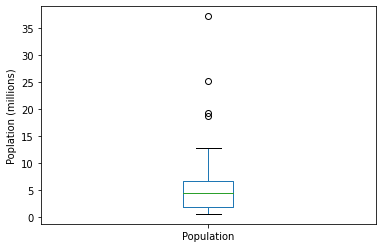

In [14]:
ax = (state['Population'] / 1_000_000).plot.box()
ax.set_ylabel('Poplation (millions)')

From this boxplot we can immediately see that the median state population is about 5
million, half the states fall between about 2 million and about 7 million, and there are
some high population outliers. The top and bottom of the box are the 75th and 25th
percentiles, respectively. The median is shown by the horizontal line in the box. The
dashed lines, referred to as whiskers, extend from the top and bottom of the box to
indicate the range for the bulk of the data. There are many variations of a boxplot;
see, for example, the documentation for the R function boxplot. By
default, the R function extends the whiskers to the furthest point beyond the box,
except that it will not go beyond __1.5 times the IQR__. Matplotlib uses the same implementation; other software may use a different rule.

Any data outside of the whiskers is plotted as single points or circles (often considered outliers).

### Frequency Tables and Histograms

A frequency table of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each segment.

The function `pandas.cut` creates a series that maps the values into the segments.
Using the method `value_counts` , we get the frequency table:

In [15]:
binned_population = pd.cut(state['Population'], 10)
binned_population.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

In [16]:
binned_population.name = 'binned_population'
df = pd.concat([state, binned_population], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binned_population'):
    groups.append({
        'Bin_Range': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })

pd.DataFrame(groups)

,Bin_Range,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


The least populous state is Wyoming, with 563,626 people, and the most populous is
California, with 37,253,956 people. This gives us a range of 37,253,956 – 563,626 =
36,690,330, which we must divide up into equal size bins—let’s say 10 bins. With 10
equal size bins, each bin will have a width of 3,669,033, so the first bin will span from
563,626 to 4,232,658. By contrast, the top bin, 33,584,923 to 37,253,956, has only one
state: California. The two bins immediately below California are empty, until we
reach Texas. It is important to include the empty bins; the fact that there are no values
in those bins is useful information. It can also be useful to experiment with different
bin sizes. If they are too large, important features of the distribution can be obscured.
If they are too small, the result is too granular, and the ability to see the bigger picture
is lost.

___
Both frequency tables and percentiles summarize the data by creating bins. In general, quartiles and deciles will have the same count
in each bin (equal-count bins), but the bin sizes will be different.
The frequency table, by contrast, will have different counts in the
bins (equal-size bins), and the bin sizes will be the same.
___

A histogram is a way to visualize a frequency table, with bins on the x-axis and the
data count on the y-axis.

`pandas` supports histograms for data frames with the `DataFrame.plot.hist` method.
Use the keyword argument bins to define the number of bins. The various plot methods return an axis object that allows further fine-tuning of the visualization using
Matplotlib :

Text(0.5, 0, 'Population (millions)')

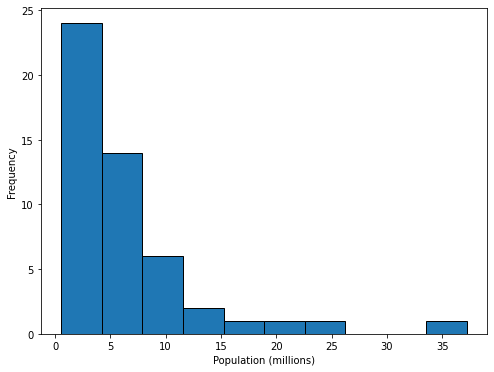

In [17]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize = (8, 6), edgecolor = 'k')
ax.set_xlabel('Population (millions)')

__Statistical Moments__
In statistical theory, __location__ and __variability__ are referred to as the
__first__ and __second__ __moments__ of a distribution. The __third__ and __fourth__
__moments__ are called __skewness__ and __kurtosis__. Skewness refers to
whether the data is skewed to larger or smaller values, and kurtosis
indicates the propensity of the data to have extreme values.

### Density Plots and Estimates

Related to the histogram is a density plot, which shows the distribution of data values
as a continuous line. A density plot can be thought of as a smoothed histogram,
although it is typically computed directly from the data through a kernel density estimate.

`pandas` provides the density method to create a density plot. Use the argument
`bw_method` to control the smoothness of the density curve:

Text(0.5, 0, 'Murder Rate (per 100, 000)')

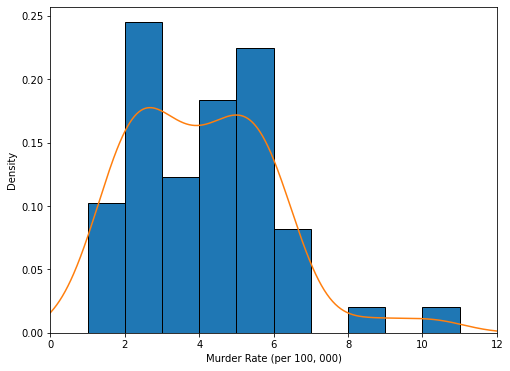

In [18]:
ax = state['Murder.Rate'].plot.hist(density = True,
                                    xlim = [0, 12],
                                    bins = range(1, 12),
                                    edgecolor = 'k',
                                    figsize = (8, 6))
state['Murder.Rate'].plot.density(ax = ax)
ax.set_xlabel('Murder Rate (per 100, 000)')

Plot functions often take an optional axis ( `ax` ) argument, which will cause the
plot to be added to the same graph.

____
#### Density Estimation
Density estimation is a rich topic with a long history in statistical
literature. In fact, over 20 R packages have been published that
offer functions for density estimation. Deng-Wickham-2011  give
a comprehensive review of R packages, with a particular recom‐
mendation for ASH or KernSmooth . The density estimation methods
in pandas and scikit-learn also offer good implementations. For
many data science problems, there is no need to worry about the
various types of density estimates; it suffices to use the base
functions.

____

## Exploring Binary and Categorical Data

For categorical data, simple proportions or percentages tell the story of the data.

Getting a summary of a binary variable or a categorical variable with a few categories
is a fairly easy matter: we just figure out the proportion of 1s, or the proportions of
the important categories. For example, table below shows the percentage of delayed
flights by the cause of delay at Dallas/Fort Worth Airport since 2010. Delays are categorized as being due to factors under carrier control, air traffic control (ATC) system
delays, weather, security, or a late inbound aircraft.


In [19]:
dfw = pd.read_csv('../data/dfw_airline.csv')

In [20]:
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


Bar charts, seen often in the popular press, are a common visual tool for displaying a
single categorical variable. Categories are listed on the x-axis, and frequencies or proportions on the y-axis.

Text(0, 0.5, 'Count')

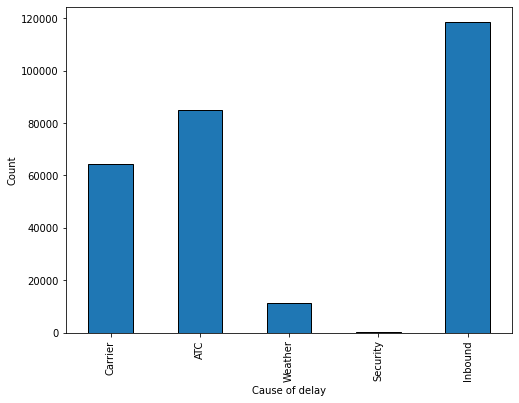

In [21]:
ax = dfw.transpose().plot.bar(figsize = (8, 6),
                              legend = False,
                              edgecolor = 'k')
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

Note that a bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a factor variable, while in a histogram the x-axis represents values
of a single variable on a numeric scale. In a histogram, the bars are typically shown
touching each other, with gaps indicating values that did not occur in the data. In a
bar chart, the bars are shown separate from one another.

Pie charts are an alternative to bar charts, although statisticians and data visualization
experts generally eschew pie charts as less visually informative.

____
#### Numerical Data as Categorical Data
In “Frequency Tables and Histograms”, we looked at
frequency tables based on binning the data. This implicitly converts
the numeric data to an ordered factor. In this sense, histograms and
bar charts are similar, except that the categories on the x-axis in the
bar chart are not ordered. Converting numeric data to categorical
data is an important and widely used step in data analysis since it
reduces the complexity (and size) of the data. This aids in the discovery of relationships between features, particularly at the initial
stages of an analysis.
____

### Mode

The mode is the value—or values in case of a tie—that appears most often in the data.
For example, the mode of the cause of delay at Dallas/Fort Worth airport is
“Inbound.” As another example, in most parts of the United States, the mode for religious preference would be Christian. The mode is a simple summary statistic for
categorical data, and it is generally not used for numeric data.

### Expected Value

A special type of categorical data is data in which the categories represent or can be
mapped to discrete values on the same scale. A marketer for a new cloud technology,
for example, offers two levels of service, one priced at \\$300/month and another at
\\$50/month. The marketer offers free webinars to generate leads, and the firm figures
that 5% of the attendees will sign up for the \\$300 service, 15% will sign up for the $50
service, and 80% will not sign up for anything. This data can be summed up, for
financial purposes, in a single “expected value,” which is a form of weighted mean, in
which the weights are probabilities.
The expected value is calculated as follows:
1. Multiply each outcome by its probability of occurrence.
2. Sum these values.

In the cloud service example, the expected value of a webinar attendee is thus \\$22.50
per month, calculated as follows:

$$ EV = (0.05)(300) + (0.15)(50) + (0.80)(0) = 22.5$$

The expected value is really a form of weighted mean: it adds the ideas of future
expectations and probability weights, often based on subjective judgment. Expected
value is a fundamental concept in business valuation and capital budgeting—for
example, the expected value of five years of profits from a new acquisition, or the
expected cost savings from new patient management software at a clinic.


### Probability

We referred above to the probability of a value occurring. Most people have an intuitive understanding of probability, encountering the concept frequently in weather
forecasts (the chance of rain) or sports analysis (the probability of winning). Sports
and games are more often expressed as odds, which are readily convertible to probabilities (if the odds that a team will win are 2 to 1, its probability of winning is 2/(2+1)
= 2/3). Surprisingly, though, the concept of probability can be the source of deep
philosophical discussion when it comes to defining it. Fortunately, we do not need a
formal mathematical or philosophical definition here. For our purposes, the probabil‐
ity that an event will happen is the proportion of times it will occur if the situation
could be repeated over and over, countless times. Most often this is an imaginary construction, but it is an adequate operational understanding of probability.

## Correlation

Exploratory data analysis in many modeling projects (whether in data science or in
research) involves examining correlation among predictors, and between predictors
and a target variable. Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go
with low values of Y. If high values of X go with low values of Y, and vice versa, the
variables are negatively correlated.

Correlation coefficient
* A metric that measures the extent to which numeric variables are associated with
one another (ranges from –1 to +1).

Correlation matrix
* A table where the variables are shown on both rows and columns, and the cell
values are the correlations between the variables.

Scatterplot
* A plot in which the x-axis is the value of one variable, and the y-axis the value of
another.

More useful is a standardized variant: the correlation coefficient, which gives an estimate of the correlation between two variables that always lies on the same scale. To
compute Pearson’s correlation coefficient, we multiply deviations from the mean for
variable 1 times those for variable 2, and divide by the product of the standard
deviations:

$$ r = \frac{\sum_{}^{} (x_i - \bar{x})(y_i - \bar{y}}{(n - 1) s_x s_y} $$

The correlation coefficient always lies between +1
(perfect positive correlation) and –1 (perfect negative correlation); 0 indicates no
correlation.

__Variables can have an association that is not linear, in which case the correlation coefficient may not be a useful metric.__
The relationship between tax rates and revenue
raised is an example: as tax rates increase from zero, the revenue raised also increases.
However, once tax rates reach a high level and approach 100%, tax avoidance increases and tax revenue actually declines.

In [22]:
sp500_sym = pd.read_csv('../data/sp500_sectors.csv')
sp500_px = pd.read_csv('../data/sp500_data.csv.gz', index_col=0)

In [23]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

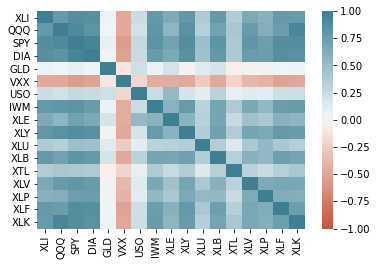

In [30]:
sns.heatmap(etfs.corr(), vmin = -1, vmax = 1,
            cmap = sns.diverging_palette(20, 220, as_cmap = True))



The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.


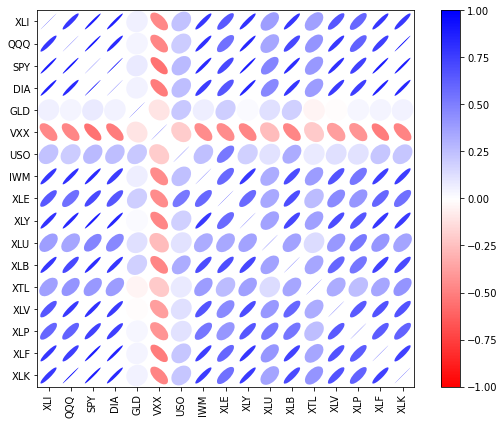

In [37]:


from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, fig

m, fig = plot_corr_ellipses(etfs.corr(), figsize=(8, 6), cmap='bwr_r')
fig.colorbar(m)
fig.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

Like the mean and standard deviation, the correlation coefficient is sensitive to outliers in the data. Software packages offer robust alternatives to the classical correlation
coefficient. For example, the R package robust uses the function covRob to compute a
robust estimate of correlation. The methods in the scikit-learn module
sklearn.covariance implement a variety of approaches.

Statisticians long ago proposed other types of correlation coefficients, such as Spearman’s rho or Kendall’s tau. These are correla‐
tion coefficients based on the rank of the data. Since they work
with ranks rather than values, these estimates are robust to outliers
and can handle certain types of nonlinearities. However, data scientists can generally stick to Pearson’s correlation coefficient, and its
robust alternatives, for exploratory analysis. The appeal of rankbased estimates is mostly for smaller data sets and specific hypothesis tests.

### Scatterplots

The standard way to visualize the relationship between two measured data variables is
with a scatterplot. The x-axis represents one variable and the y-axis another, and each
point on the graph is a record

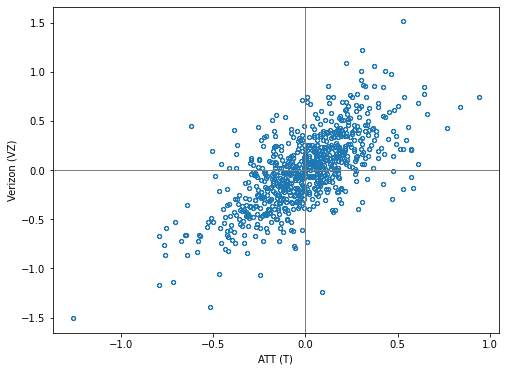

In [38]:
ax = telecom.plot.scatter(x = 'T', y = 'VZ', figsize = (8, 6), marker = '$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color = 'grey', lw = 1)
ax.axvline(0, color = 'grey', lw = 1)

## Exploring Two or More Variables

Familiar estimators like mean and variance look at variables one at a time (univariate
analysis). Correlation analysis is an important method
that compares two variables (bivariate analysis). In this section we look at additional
estimates and plots, and at more than two variables (multivariate analysis).

Like univariate analysis, bivariate analysis involves both computing summary statistics and producing visual displays. The appropriate type of bivariate or multivariate
analysis depends on the nature of the data: numeric versus categorical.

### Hexagonal Binning and Contours
### (Plotting Numeric Versus Numeric Data)

Scatterplots are fine when there is a relatively small number of data values. For data sets with hun‐
dreds of thousands or millions of records, a scatterplot will be too dense, so we need a
different way to visualize the relationship. To illustrate, consider the data set kc_tax ,
which contains the tax-assessed values for residential properties in King County,
Washington. In order to focus on the main part of the data, we strip out very expen‐
sive and very small or large residences using the subset function:

In [40]:
kc_tax = pd.read_csv('../data/kc_tax.csv.gz')

In [41]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

In [42]:
kc_tax0.shape

(432693, 3)

The Figure is a hexagonal binning plot of the relationship between the finished square
feet and the tax-assessed value for homes in King County. Rather than plotting
points, which would appear as a monolithic dark cloud, we grouped the records into
hexagonal bins and plotted the hexagons with a color indicating the number of
records in that bin. In this chart, the positive relationship between square feet and
tax-assessed value is clear. An interesting feature is the hint of additional bands above
the main (darkest) band at the bottom, indicating homes that have the same square
footage as those in the main band but a higher tax-assessed value.

Text(0, 0.5, 'Tax-Assessed Value')

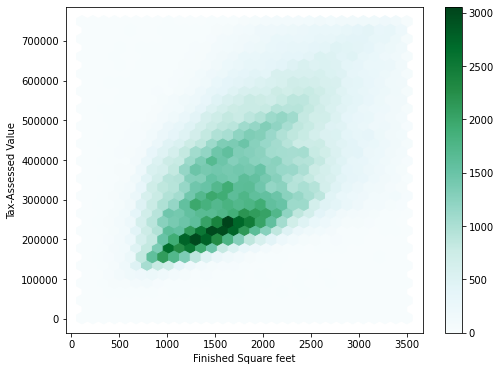

In [45]:
# figure 1-8
ax = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y = 'TaxAssessedValue',
                         gridsize = 30, sharex = False, figsize = (8, 6))
ax.set_xlabel('Finished Square feet')
ax.set_ylabel('Tax-Assessed Value')

Figure 1-9 uses contours overlaid onto a scatterplot to visualize the relationship
between two numeric variables. The contours are essentially a topographical map to
two variables; each contour band represents a specific density of points, increasing as
one nears a “peak.” This plot shows a similar story as Figure 1-8: there is a secondary
peak “north” of the main peak.

Text(0, 0.5, 'Tax-Assessed Value')

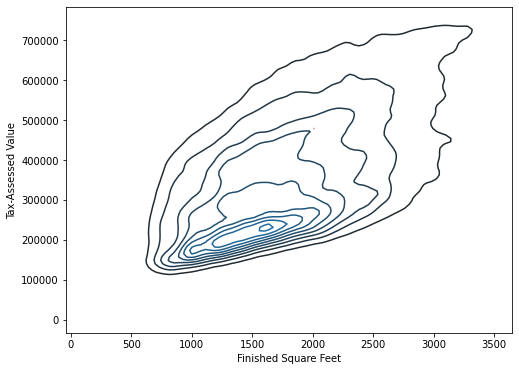

In [47]:
# figure 1-9
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.kdeplot(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue, ax = ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

Other types of charts are used to show the relationship between two numeric variables, including heat maps. Heat maps, hexagonal binning, and contour plots all give
a visual representation of a two-dimensional density. In this way, they are natural
analogs to histograms and density plots.

## Two Categorical Variables

A useful way to summarize two categorical variables is a contingency table—a table of
counts by category. Table 1-8 shows the contingency table between the grade of a personal loan and the outcome of that loan. This is taken from data provided by Lending
Club, a leader in the peer-to-peer lending business. The grade goes from A (high) to
G (low). The outcome is either fully paid, current, late, or charged off (the balance of
the loan is not expected to be collected). This table shows the count and row percentages. High-grade loans have a very low late/charge-off percentage as compared with
lower-grade loans.

The `pivot_table` method creates the pivot table in Python. The aggfunc argument
allows us to get the counts. Calculating the percentages is a bit more involved:

In [48]:
lc_loans = pd.read_csv('../data/lc_loans.csv')

In [49]:
crosstab = lc_loans.pivot_table(index = 'grade', columns = 'status',
                                aggfunc = lambda x: len(x), margins = True)

In [50]:
df = crosstab.loc['A':'G', :].copy()

In [52]:
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis = 0)

In [53]:
df['All'] = df['All'] / sum(df['All'])

In [56]:
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,2.972520e-07,0.000010,0.000004,8.925173e-08,0.160746
B,3.025942e-07,0.000005,0.000002,1.173394e-07,0.293529
C,4.122303e-07,0.000006,0.000002,1.900653e-07,0.268039
D,9.075465e-07,0.000010,0.000002,4.183378e-07,0.164708
E,2.346204e-06,0.000020,0.000005,1.134301e-06,0.077177
F,9.164438e-06,0.000051,0.000014,3.639351e-06,0.028614
G,3.893725e-05,0.000189,0.000061,1.894502e-05,0.007187


## Categorical and Numeric Data

Boxplots are a simple way to visually
compare the distributions of a numeric variable grouped according to a categorical
variable. For example, we might want to compare how the percentage of flight delays
varies across airlines. Figure 1-10 shows the percentage of flights in a month that
were delayed where the delay was within the carrier’s control:

In [57]:
airline_stats = pd.read_csv('../data/airline_stats.csv')

Text(0.5, 0.98, '')

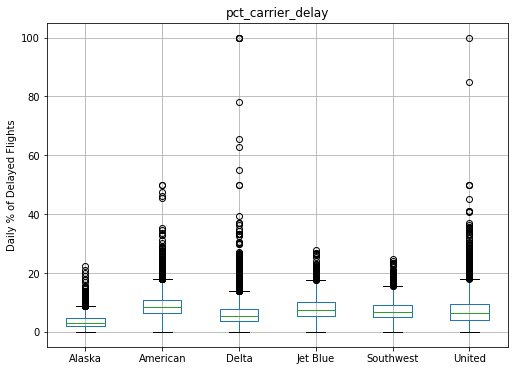

In [59]:
# figure 1-10
ax = airline_stats.boxplot(by = 'airline', column = 'pct_carrier_delay', figsize = (8, 6))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

Alaska stands out as having the fewest delays, while American has the most delays:
the lower quartile for American is higher than the upper quartile for Alaska.

A violin plot, introduced by [Hintze-Nelson-1998], is an enhancement to the boxplot
and plots the density estimate with the density on the y-axis. The density is mirrored
and flipped over, and the resulting shape is filled in, creating an image resembling a
violin. The advantage of a violin plot is that it can show nuances in the distribution
that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly
shows the outliers in the data.

Text(0, 0.5, 'Daily % of Delayed Flights')

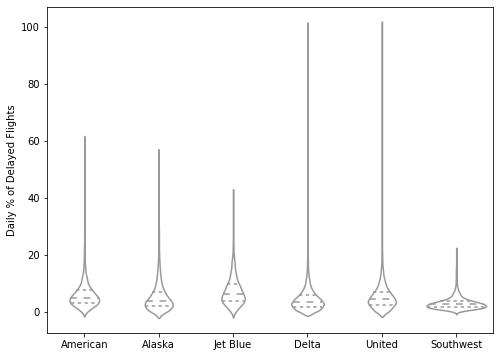

In [62]:
plt.figure(figsize = (8, 6))
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_atc_delay,
                    inner = 'quartile', color = 'white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

## Visualizing Multiple Variables

The types of charts used to compare two variables—scatterplots, hexagonal binning,
and boxplots—are readily extended to more variables through the notion of conditioning. As an example, look back at Figure 1-8, which showed the relationship
between homes’ finished square feet and their tax-assessed values. We observed that
there appears to be a cluster of homes that have higher tax-assessed value per square
foot. Diving deeper, Figure 1-12 accounts for the effect of location by plotting the
data for a set of zip codes. Now the picture is much clearer: tax-assessed value is
much higher in some zip codes (98105, 98126) than in others (98108, 98188). This
disparity gives rise to the clusters observed in Figure 1-8.

Most Python packages base their visualizations on Matplotlib . While it is in principle possible to create faceted graphs using Matplotlib , the code can get complicated.
Fortunately, seaborn has a relatively straightforward way of creating these graphs:

In [63]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


In [80]:
def hex_bin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap = True)
    plt.hexbin(x, y, gridsize = 25, cmap = cmap, **kwargs)

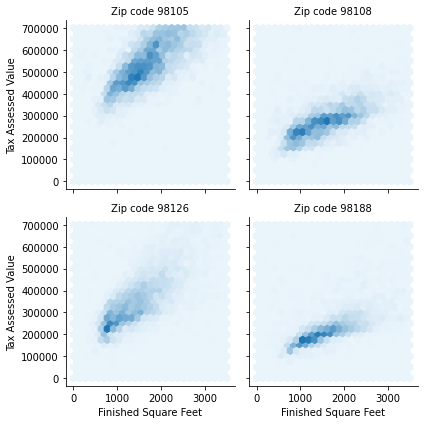

In [82]:
g = sns.FacetGrid(kc_tax_zip, col = 'ZipCode', col_wrap = 2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent = [0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')